In [1]:
import tabpy as tb
import pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import pi
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#setting colors for our plots
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
#setting the font, figsize and font size globally
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'font.size':15})
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
#data
df = pd.read_csv('Fifa22r.csv')
df2 = df[['Overall', 'Team_Overall']]
dfo = df.select_dtypes(include = ['object'])
df1 = dfo.drop(columns =  ['Positions','NationalTeam'])
#concat with overall data for club and player
dff = pd.concat([df1, df2], axis = 1)
#pivoting our data to show mean rating of teams 
df_p = pd.pivot_table( data = dff, index = 'League', aggfunc = 'mean').reset_index().round(1)
#sort data to rep the top twenty leagues leagues
df_p = df_p.sort_values(by = 'Team_Overall', ascending = False)
df_p1 = df_p.head(20).reset_index().drop(columns = ['index'])
df_p1.League.unique()
#selecting players from the top 20 leagues only
main = df[df['League'].isin(df_p1.League.unique())]

## League and player rating 

The first step in our visualization with be pivoting our data so as to be able to visualize the ratings of average player rating and team rating in the leagues.

In [4]:
#plotting the leagues with best player rating 
#pivoting our data to show mean rating of teams 
df_p = pd.pivot_table( data = dff, index = 'League', aggfunc = 'mean').reset_index().round(1)
#sort data to rep the top twenty leagues leagues
df_p = df_p.sort_values(by = 'Team_Overall', ascending = False)
df_p1 = df_p.reset_index().drop(columns = ['index']).reset_index()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


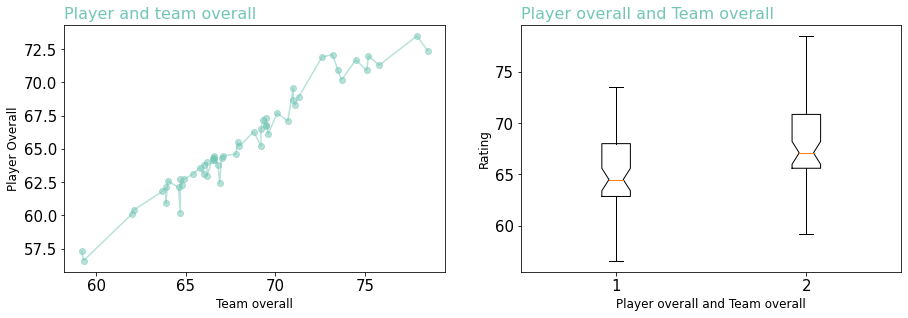

In [5]:
#initialize figure
fig = plt.figure()

#plot 1
plt.subplot(221)
plt.plot('Team_Overall', 'Overall', data = df_p1, color='#73C6B6', marker = 'o', alpha = 0.5)
plt.title('Player and team overall', fontsize=16, color='#73C6B6', loc='left')
plt.ylabel('Player Overall', fontsize = 12)
plt.xlabel('Team overall', fontsize = 12)

#plot 2
plt.subplot(222)
plt.boxplot(df_p1[['Overall', 'Team_Overall']], notch = True)
plt.title('Player overall and Team overall',fontsize=16, color='#73C6B6', loc='left')
plt.ylabel('Rating', fontsize = 12)
plt.xlabel('Player overall and Team overall', fontsize = 12)
plt.show()

Drawing a marginal plot to plot the overall ranking of the leagues and players ranking.

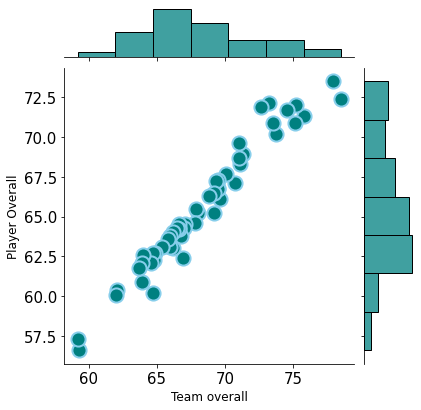

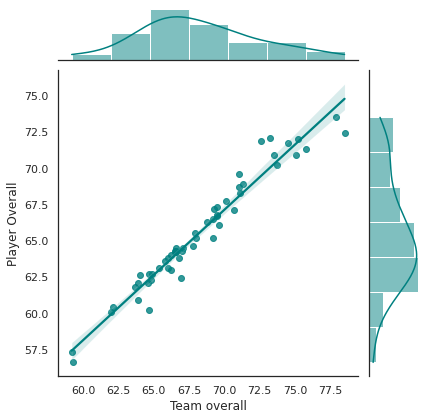

In [6]:
#Marginal plot with a scatter plot kind
sb.jointplot(x=df_p1["Team_Overall"], y=df_p1["Overall"], kind='scatter', s=200, color='teal', edgecolor="skyblue", linewidth=2)
plt.ylabel('Player Overall', fontsize = 12)
plt.xlabel('Team overall', fontsize = 12)
plt.show()
# hex kind
sb.set(style="white", color_codes=True)
sb.jointplot(x=df_p1["Team_Overall"], y=df_p1["Overall"], kind= 'reg', color="teal")
plt.ylabel('Player Overall', fontsize = 12)
plt.xlabel('Team overall', fontsize = 12)
plt.show()

Checking ion the distribution of the data for the player and team rating

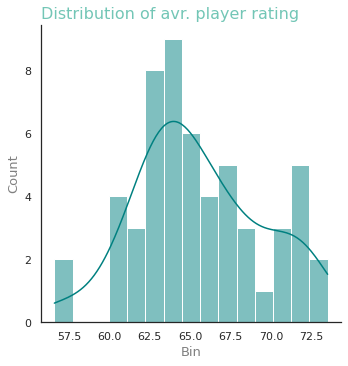

In [7]:
#player rating 
sb.displot(df_p1['Overall'], bins = 15,kde = True, color = 'teal')
plt.title('Distribution of avr. player rating', fontsize=16, color='#73C6B6', loc='left')
plt.ylabel('Count', fontsize = 13, color = 'grey')
plt.xlabel('Bin', fontsize = 13, color = 'grey')
plt.show()

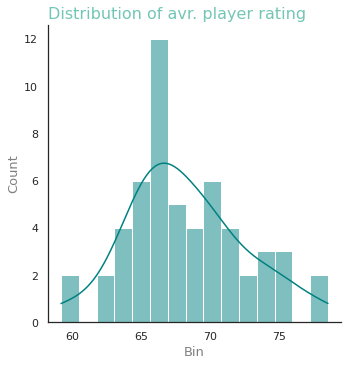

In [8]:
#Team rating 
sb.displot(df_p1['Team_Overall'], bins = 15,kde = True, color ='teal' )
plt.title('Distribution of avr. player rating', fontsize=16, color='#73C6B6', loc='left')
plt.ylabel('Count', fontsize = 13, color = 'grey')
plt.xlabel('Bin', fontsize = 13, color = 'grey')
plt.show()

y=0.900259x+(4.112336)


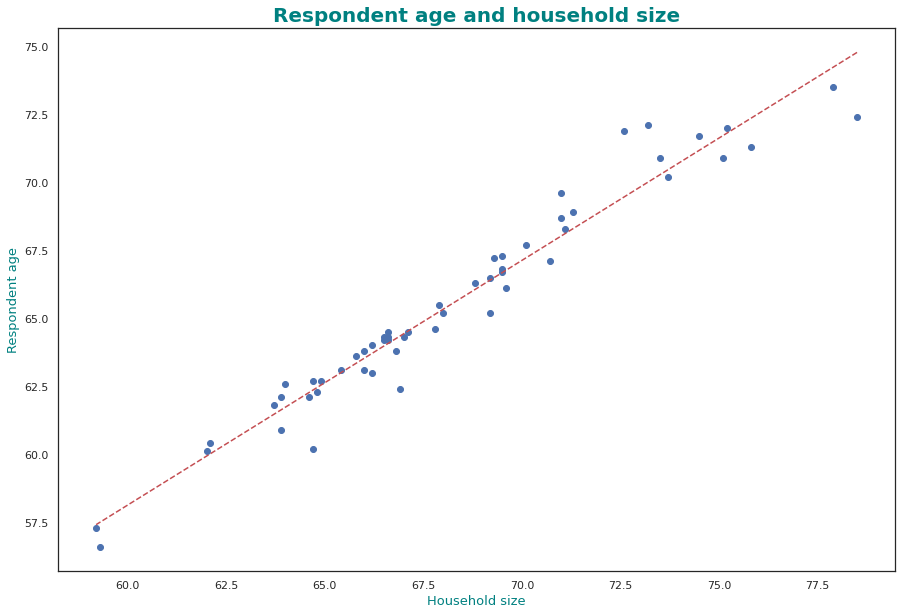

In [9]:
#creating a scatter plot with a trend line
x = df_p1['Team_Overall']
y = df_p1['Overall']
pylab.plot(x,y,'o')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.xlabel('Household size', fontsize = 13, color = 'teal')
plt.ylabel('Respondent age', fontsize = 13, color = 'teal')
plt.title('Respondent age and household size', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.show()

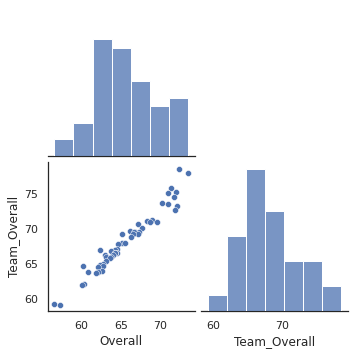

In [10]:
#creating teh pairplot for our numerical variables
sb.pairplot(df_p1.drop(columns = 'index'), corner = True)
plt.show()

Creating a subset of the data with only players from the top twenty leagues based on the average of teams rating.

In [11]:
#data
df2 = df[['Overall', 'Team_Overall']]
dfo = df.select_dtypes(include = ['object'])
df1 = dfo.drop(columns =  ['Positions','NationalTeam'])
#concat with overall data for club and player
dff = pd.concat([df1, df2], axis = 1)
#pivoting our data to show mean rating of teams 
df_p = pd.pivot_table( data = dff, index = 'League', aggfunc = 'mean').reset_index().round(1)
#sort data to rep the top twenty leagues leagues
df_p = df_p.sort_values(by = 'Team_Overall', ascending = False)
df_p1 = df_p.head(20).reset_index().drop(columns = ['index'])
df_p1.League.unique()
#selecting players from the top 20 leagues only
main = df[df['League'].isin(df_p1.League.unique())]
main.head()

,index,Name,Age,Height,Weight,Nationality,Overall,Potential,Growth,TotalStats,...,Team_Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,0,L. Messi,34,170,72,Argentina,93,93,0,2219,...,86.0,89.0,83.0,85.0,160000000.0,10.0,9.0,33.0,28.1,25.9
1,1,R. Lewandowski,32,185,81,Poland,92,92,0,2212,...,84.0,92.0,85.0,81.0,100000000.0,10.0,10.0,28.0,26.6,24.8
2,2,Cristiano Ronaldo,36,187,83,Portugal,91,91,0,2208,...,84.0,85.0,84.0,83.0,175000000.0,9.0,8.0,33.0,26.6,25.9
3,3,K. Mbappé,22,182,73,France,91,95,4,2175,...,86.0,89.0,83.0,85.0,160000000.0,10.0,9.0,33.0,28.1,25.9
4,4,J. Oblak,28,188,87,Slovenia,91,93,2,1413,...,84.0,84.0,83.0,83.0,68600000.0,9.0,9.0,32.0,28.1,25.2


## Grouping data

We will group the filtered data based on th eplayers positions after this will further gorup our data into four groups that is defenders, goalkeepers, midfielders and attackers.

In [12]:
grouped = main.groupby(main.BestPosition)
RW = grouped.get_group("RW")
ST = grouped.get_group("ST")
GK = grouped.get_group("GK")
CM = grouped.get_group("CM")
LW = grouped.get_group("LW")
CDM = grouped.get_group("CDM")
LM = grouped.get_group("LM")
CF = grouped.get_group("CF")
CB = grouped.get_group("CB")
CAM = grouped.get_group("CAM")
LB = grouped.get_group("LB")
RB = grouped.get_group("RB")
RM = grouped.get_group("RM")
LWB = grouped.get_group("LWB")
RWB = grouped.get_group("RWB")

#creating the groups
g1 = GK
g2 = pd.concat([LB, RB, CB, RWB, LWB])
g3 = pd.concat([RM, LM, CAM, CM, CDM])
g4 = pd.concat([CF, ST, LW, RW])

We will then analyze each group independetly since the qualities that make a good defender are not the same qualities that make a good attacker.

## Attack

Checking on the average overall rating and player value of our players position.

In [13]:
#selecting the appropriate columns
g41 = g4.drop(columns = 'index')
g42 = g41[['Age', 'BestPosition' ,'ValueEUR', 'WageEUR']] 

#pivoting the data
df_p2 = pd.pivot_table( data = g42, index = 'BestPosition',aggfunc = 'mean').reset_index().round(1).sort_values('ValueEUR', ascending = False)
df_p2

,BestPosition,Age,ValueEUR,WageEUR
0,CF,29.2,14372058.8,55110.3
1,LW,26.4,11216118.4,30809.2
2,RW,26.3,7535689.6,26914.2
3,ST,25.1,5671934.8,18888.4


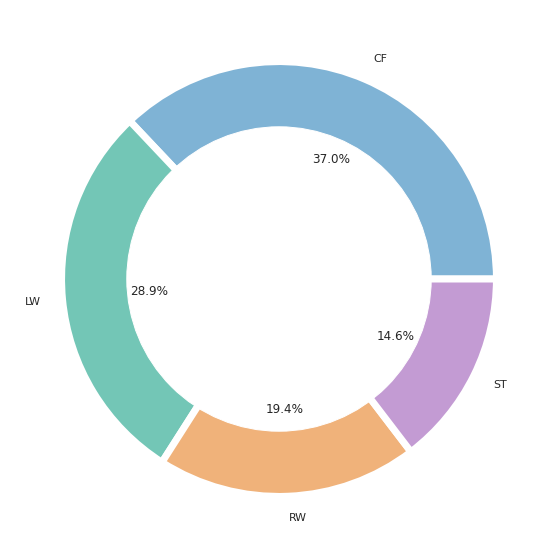

In [14]:
# creating a pie chart
names = df_p2.BestPosition
size = df_p2.ValueEUR
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, autopct = '%1.1f%%', colors = colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()